In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import load_model

# Load Dataset

In [5]:
X_train = np.loadtxt('data/input.csv', delimiter=',')
Y_train = np.loadtxt('data/labels.csv', delimiter=',')

X_test = np.loadtxt('data/input_test.csv', delimiter=',')
Y_test = np.loadtxt('data/labels_test.csv', delimiter=',')

In [14]:
X_train = X_train.reshape(len(X_train), 100,100,3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100,100,3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of X_test:  (400, 1)


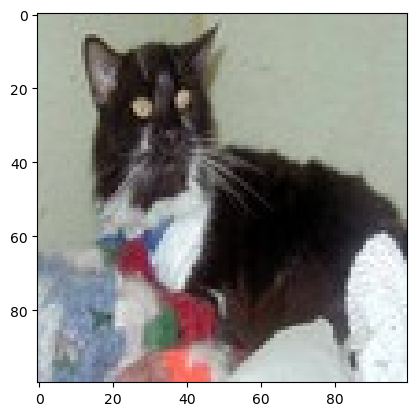

In [16]:
image = np.random.randint(0, len(X_train))
plt.imshow(X_train[image, :])
plt.show()

# Model

In [19]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(((2,2))))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(((2,2))))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 5s 169ms/step - loss: 0.2317 - accuracy: 0.9125
Epoch 2/5
32/32 [==============================] - 7s 223ms/step - loss: 0.1632 - accuracy: 0.9495
Epoch 3/5
32/32 [==============================] - 7s 223ms/step - loss: 0.1210 - accuracy: 0.9645
Epoch 4/5
32/32 [==============================] - 7s 228ms/step - loss: 0.0800 - accuracy: 0.9820
Epoch 5/5
32/32 [==============================] - 7s 223ms/step - loss: 0.0714 - accuracy: 0.9840


In [26]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 18ms/step - loss: 1.0725 - accuracy: 0.6850


[1.0725153684616089, 0.6850000023841858]

# Prediction Time

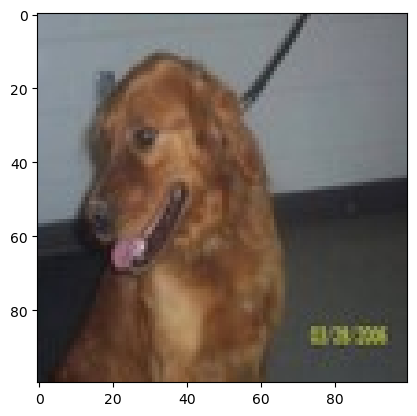

1/1 [==============================] - 0s 12ms/step
[[0.00685533]]
This image is of a Dog


In [39]:
image2 = np.random.randint(0, len(Y_test))
plt.imshow(X_test[image2, :])
plt.show()

y_pred = model.predict(X_test[image2, :].reshape(1,100,100,3))
print(y_pred)

y_pred = y_pred > 0.5

if(y_pred == 0):
    print("This image is of a Dog")
else:
    print("This image is of a Cat")

In [37]:
model.save('Class.h5')

In [35]:
Save = load_model("Class.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 64)               